In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0=time.time()

###  Simulations of strongly bent diamond crystal used as a dispersive spectrometer for XFEL pulses

In [4]:
matplotlib.rcParams['figure.figsize'] = (9.5,7)

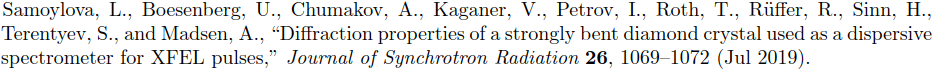
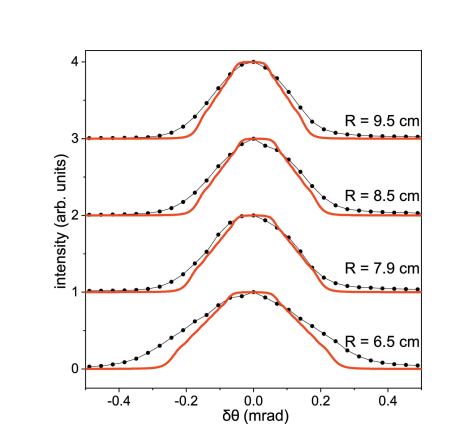 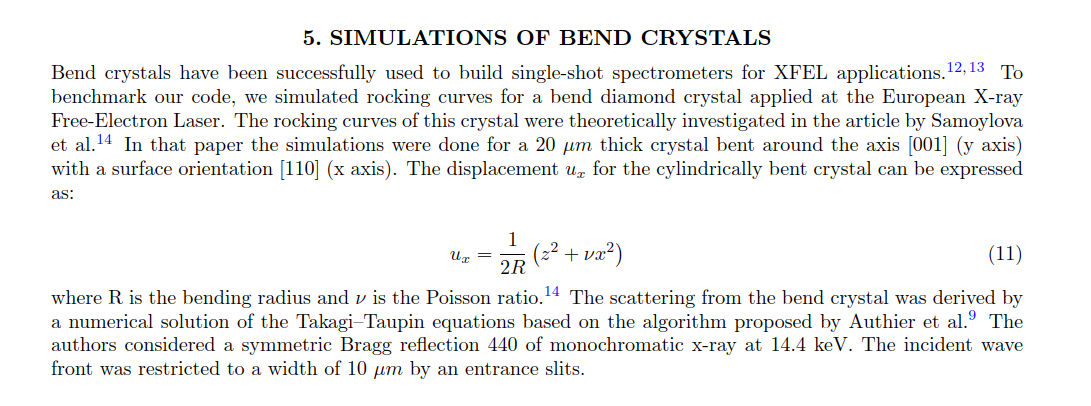

In [5]:
omega0=14400
delta=0.0
omega=omega0*(1+delta)


## Loading XCrystal configuration

In [6]:

xcr = XCrystal(XCr_path+'/config/CrystalC440Fig4.yaml',omega)
pp=xcr.configure(0,0)

## Defining single realization reflection object

In [7]:

def single_realization_with_data(delta_theta,Rock_angle):
    
    xcr = XCrystal(XCr_path+'/config/CrystalC440Fig4.yaml',omega)
    xcr.configure(delta_theta,Rock_angle)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M, xcr.Rock_angle,xcr.Delta_alpha

## Running beam propagation

In [8]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM,Ra, Da = single_realization_with_data(0e-6,0.0E-4)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Beam propagation progress: 100%|██████████| 2500/2500 [00:10<00:00, 239.64it/s]

Photon energy (omega):  14400.0 ; Reflectivity:  0.035124663958507454 ; Transmission:  0.9586863168475499


## Determining relative phase between reflected and transmitted fields

In [9]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21)) # phase difference between U1_xyz and U2_xyz calculatef from energy conservation

## Displaying results

In [10]:
Ints=np.abs(U1_xyz[0,:,0,:] + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,0,:]*0 + U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,0,:] +0.0* U2_xyz[0,:,0,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,0,:])**2 + np.abs(U2_xyz[0,:,0,:])**2

#### Reflection witout bending
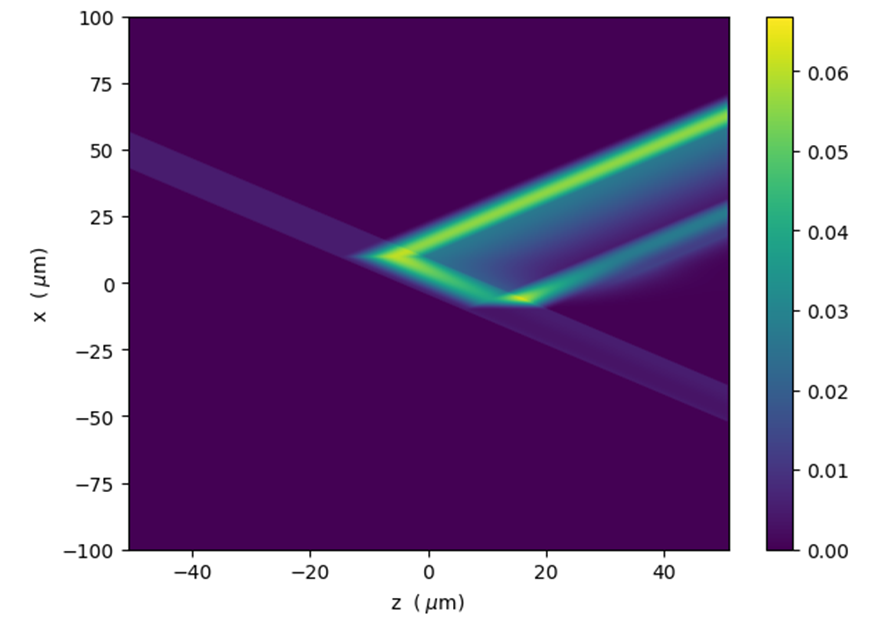

#### Reflection from bended crystal R= 9.5 cm

In [11]:
matplotlib.rcParams['figure.figsize'] = (9.5,7)

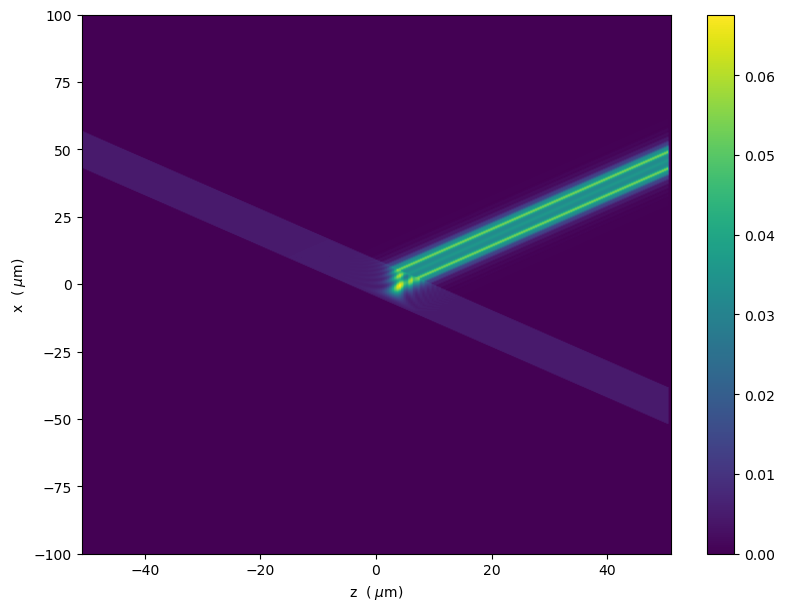

In [12]:
plt.imshow(Ints1+0.005*Ints2,extent=[-xcr.M*xcr.Z/xcr.convr*1e6/2,xcr.M*xcr.Z/xcr.convr*1e6/2,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto')
#plt.imshow(np.abs(U1_xyz[0,:,0,:])**0.5 + np.abs(U2_xyz[0,:,0,:])**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,0,xcr.xx.max()*2/xcr.convr*1e6], aspect='auto',cmap='jet')
#plt.ylim(-30, 30)
#plt.xlim(-30, 30)
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()

In [28]:
t1=time.time()
